In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests

# Load and prepare data
df = pd.read_csv('../data/ADHD LMS Evaluation dataset.csv')
# Clean column names
df.columns = df.columns.str.strip() 

In [2]:
# Preview data
print(df.head())
print("\nData shape:", df.shape)

  Participant ID  Gender  ADHD Severity Score     ADHD Level  \
0           AD01  Female                   15   Low positive   
1           AD02    Male                   13  High negative   
2           AD03  Female                    9   Low negative   
3           AD04    Male                   15   Low positive   
4           AD05    Male                   17   Low positive   

   Base LMS_Quiz score  Base LMS_SUS score  Base LMS_UEQ_Attractiveness  \
0                    5                55.0                         3.83   
1                    5                32.5                         3.33   
2                    5                57.5                         4.17   
3                    5                87.5                         3.83   
4                    9                55.0                         3.17   

   Base LMS_UEQ_Perspicuity  Base LMS_UEQ_Novelty  Base LMS_UEQ_Stimulation  \
0                      4.25                  3.50                      4.50   
1     

In [3]:
# Create composite UEQ scores
ueq_dims = ['Attractiveness', 'Perspicuity', 'Novelty', 'Stimulation', 'Dependability', 'Efficiency']
for lms in ['Base', 'Manual', 'AI']:
    ueq_cols = [f'{lms} LMS_UEQ_{dim}' for dim in ueq_dims]
    df[f'{lms}_LMS_UEQ'] = df[ueq_cols].mean(axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


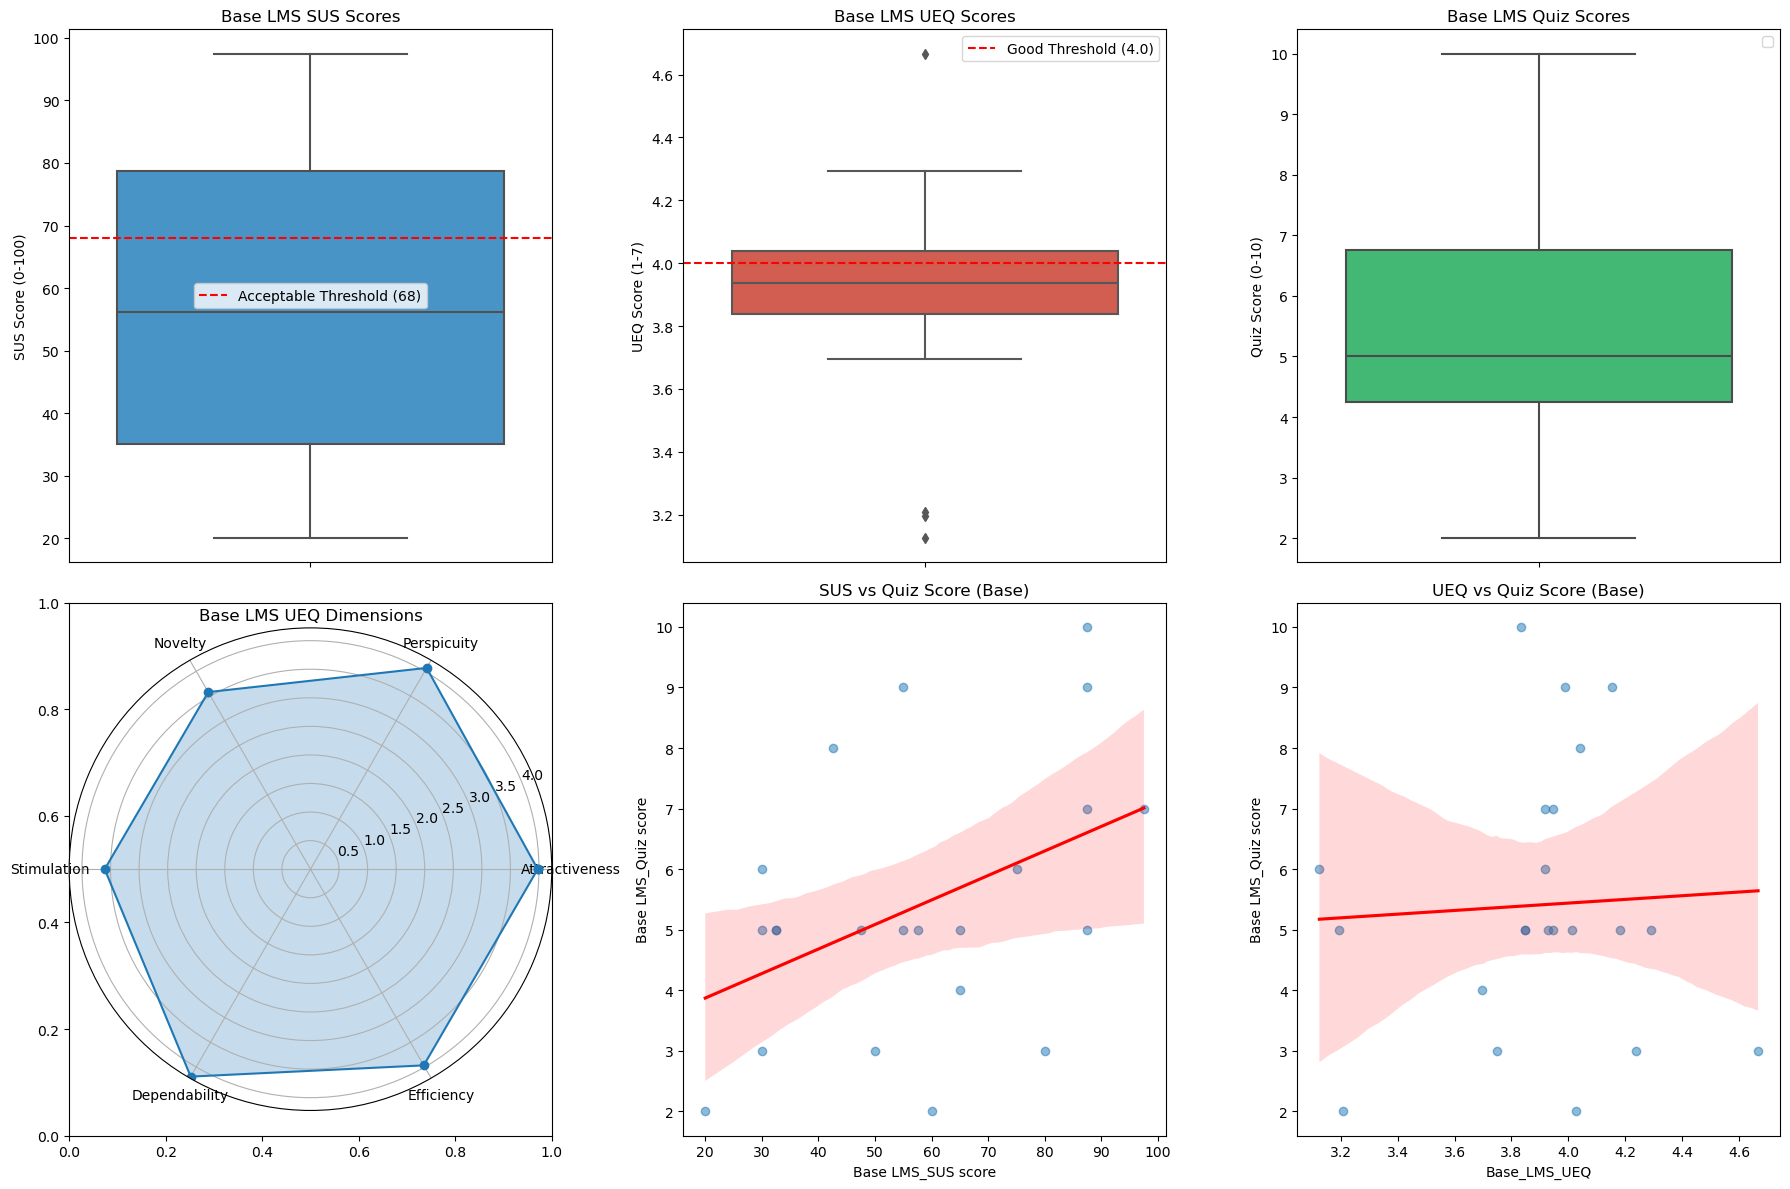

In [12]:
# Base LMS Visualizations
plt.figure(figsize=(18, 12))

# SUS Scores (Boxplot with Threshold)
plt.subplot(2, 3, 1)
sns.boxplot(y='Base LMS_SUS score', data=df, color='#3498db')
plt.axhline(68, color='red', linestyle='--', label='Acceptable Threshold (68)')
plt.title('Base LMS SUS Scores')
plt.ylabel('SUS Score (0-100)')
plt.legend()

# UEQ Scores (Boxplot with Threshold)
plt.subplot(2, 3, 2)
sns.boxplot(y='Base_LMS_UEQ', data=df, color='#e74c3c')
plt.axhline(4.0, color='red', linestyle='--', label='Good Threshold (4.0)')
plt.title('Base LMS UEQ Scores')
plt.ylabel('UEQ Score (1-7)')
plt.legend()

# Quiz Scores
plt.subplot(2, 3, 3)
sns.boxplot(y='Base LMS_Quiz score', data=df, color='#2ecc71')
plt.title('Base LMS Quiz Scores')
plt.ylabel('Quiz Score (0-10)')
plt.legend()

# UEQ Dimensions Radar Chart
plt.subplot(2, 3, 4)
angles = np.linspace(0, 2*np.pi, len(ueq_dims), endpoint=False).tolist()
angles += angles[:1]
base_means = [df[f'Base LMS_UEQ_{dim}'].mean() for dim in ueq_dims]
base_means += base_means[:1]

ax = plt.subplot(2, 3, 4, polar=True)
ax.plot(angles, base_means, 'o-', label='Base LMS')
ax.fill(angles, base_means, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(ueq_dims)
ax.set_title('Base LMS UEQ Dimensions')

# SUS vs Quiz Score
plt.subplot(2, 3, 5)
sns.regplot(x='Base LMS_SUS score', y='Base LMS_Quiz score', data=df, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('SUS vs Quiz Score (Base)')

# UEQ vs Quiz Score
plt.subplot(2, 3, 6)
sns.regplot(x='Base_LMS_UEQ', y='Base LMS_Quiz score', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('UEQ vs Quiz Score (Base)')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


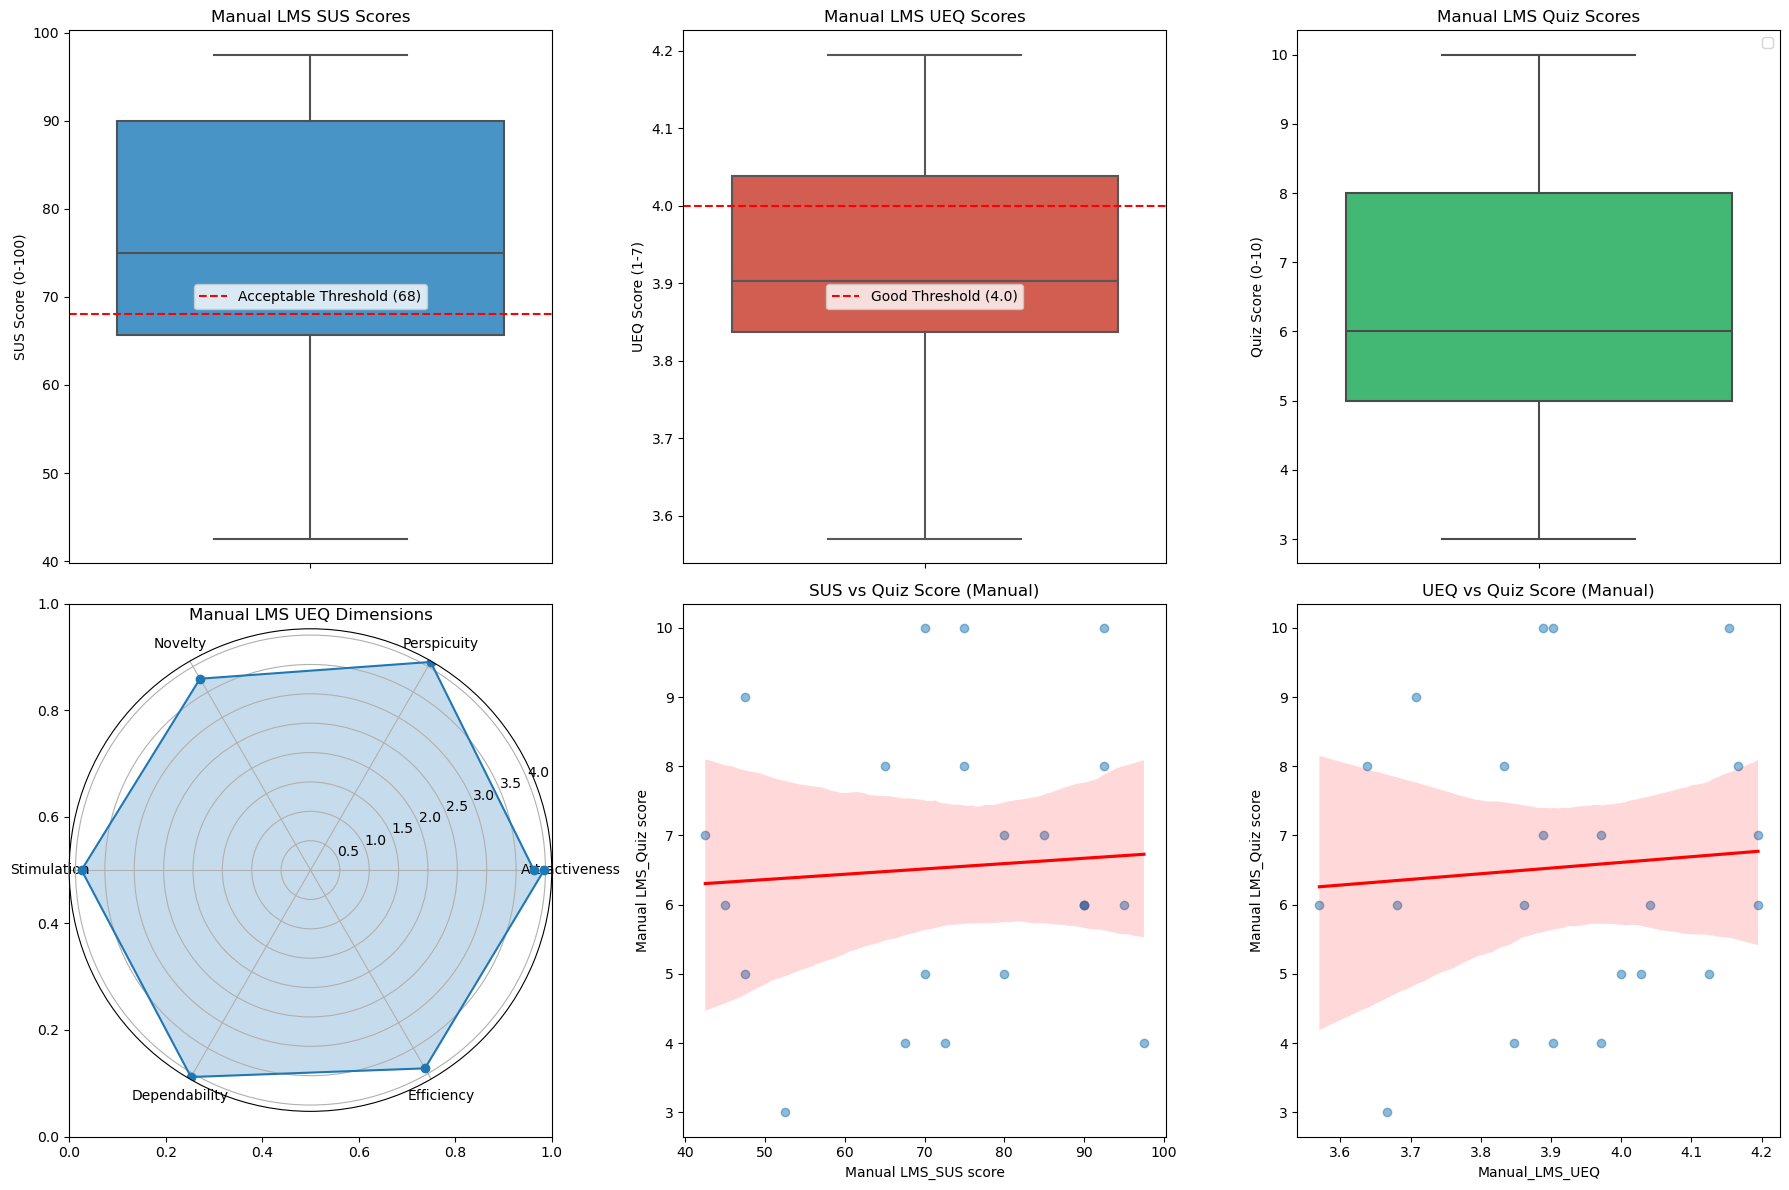

In [13]:
# Manual LMS Visualizations
plt.figure(figsize=(18, 12))

# SUS Scores (Boxplot with Threshold)
plt.subplot(2, 3, 1)
sns.boxplot(y='Manual LMS_SUS score', data=df, color='#3498db')
plt.axhline(68, color='red', linestyle='--', label='Acceptable Threshold (68)')
plt.title('Manual LMS SUS Scores')
plt.ylabel('SUS Score (0-100)')
plt.legend()

# UEQ Scores (Boxplot with Threshold)
plt.subplot(2, 3, 2)
sns.boxplot(y='Manual_LMS_UEQ', data=df, color='#e74c3c')
plt.axhline(4.0, color='red', linestyle='--', label='Good Threshold (4.0)')
plt.title('Manual LMS UEQ Scores')
plt.ylabel('UEQ Score (1-7)')
plt.legend()

# Quiz Scores
plt.subplot(2, 3, 3)
sns.boxplot(y='Manual LMS_Quiz score', data=df, color='#2ecc71')
plt.title('Manual LMS Quiz Scores')
plt.ylabel('Quiz Score (0-10)')
plt.legend()

# UEQ Dimensions Radar Chart
plt.subplot(2, 3, 4)
angles = np.linspace(0, 2*np.pi, len(ueq_dims), endpoint=False).tolist()
angles += angles[:1]
manual_means = [df[f'Manual LMS_UEQ_{dim}'].mean() for dim in ueq_dims]
manual_means += base_means[:1]

ax = plt.subplot(2, 3, 4, polar=True)
ax.plot(angles, manual_means, 'o-', label='Manual LMS')
ax.fill(angles, manual_means, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(ueq_dims)
ax.set_title('Manual LMS UEQ Dimensions')

# SUS vs Quiz Score
plt.subplot(2, 3, 5)
sns.regplot(x='Manual LMS_SUS score', y='Manual LMS_Quiz score', data=df, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('SUS vs Quiz Score (Manual)')

# UEQ vs Quiz Score
plt.subplot(2, 3, 6)
sns.regplot(x='Manual_LMS_UEQ', y='Manual LMS_Quiz score', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('UEQ vs Quiz Score (Manual)')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


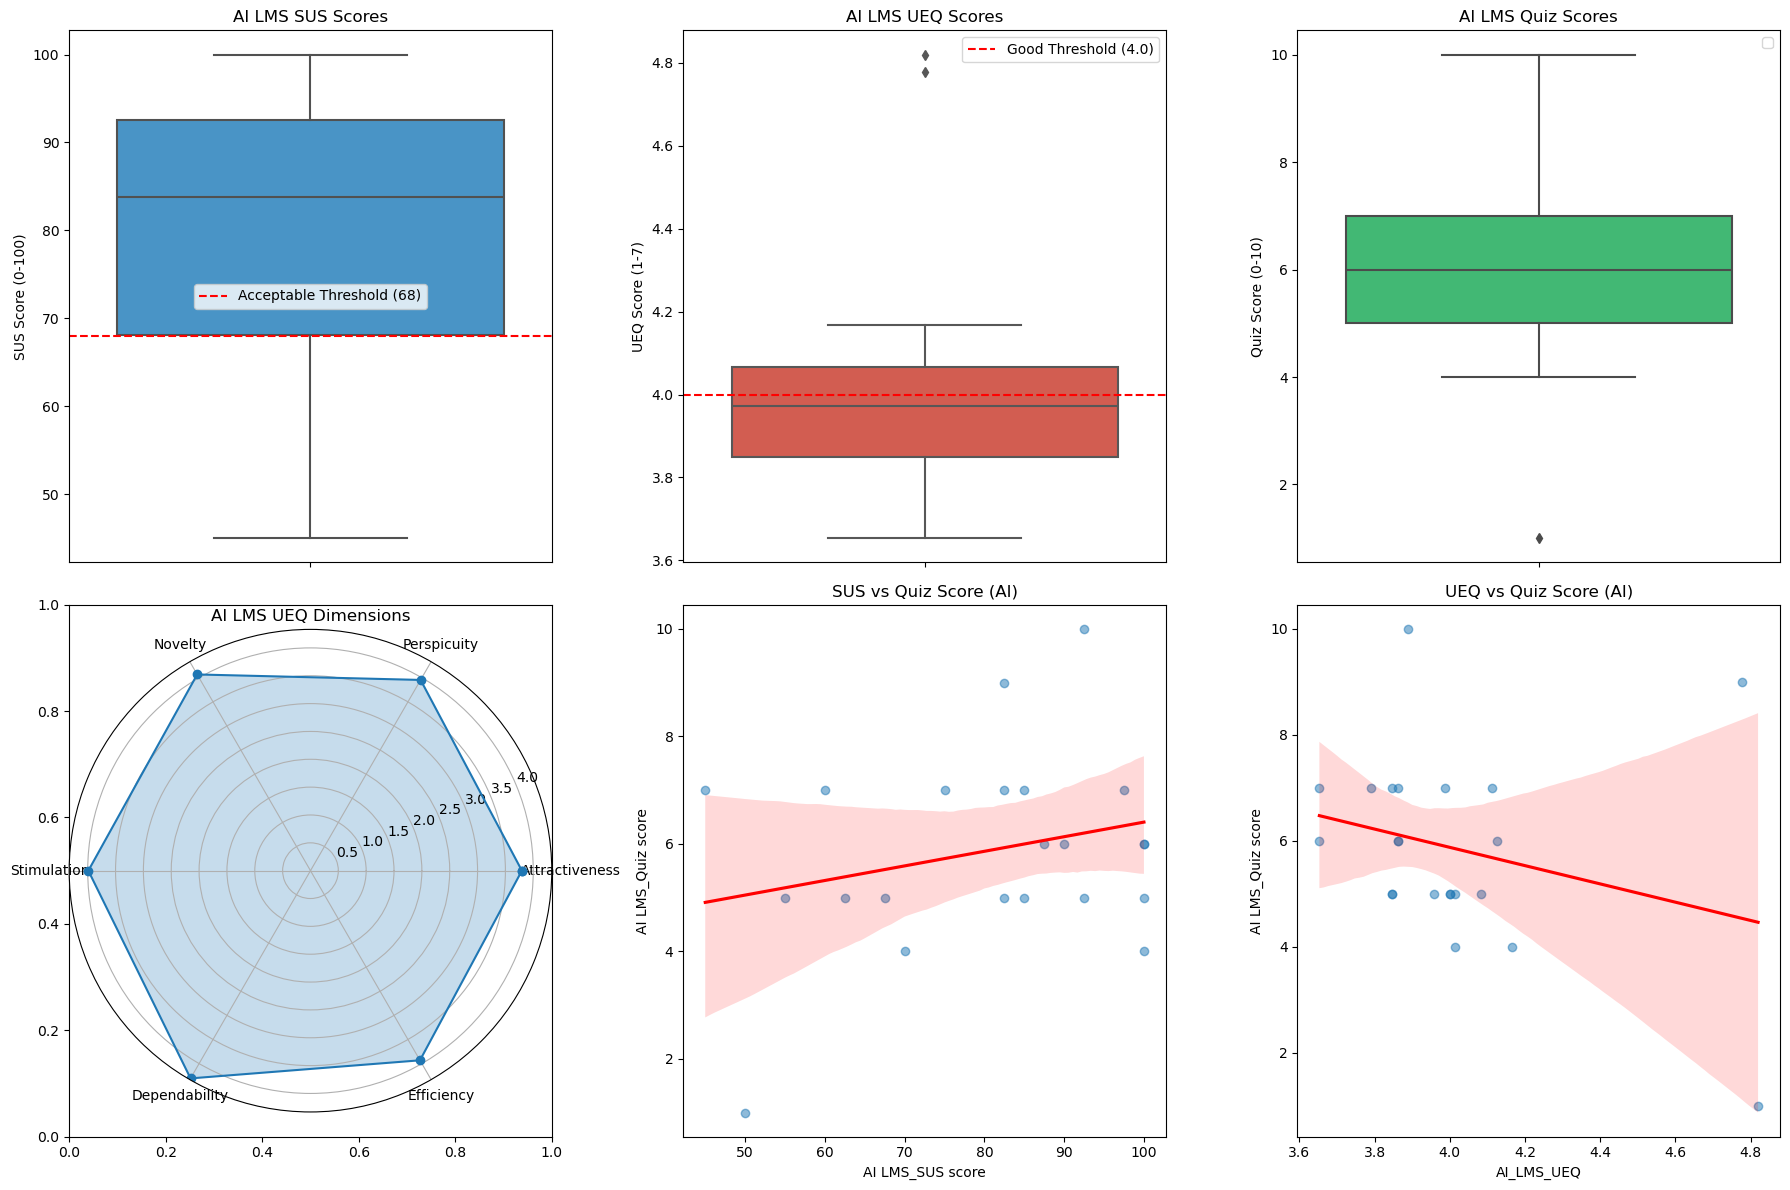

In [14]:
# AI LMS Visualizations
plt.figure(figsize=(18, 12))

# SUS Scores (Boxplot with Threshold)
plt.subplot(2, 3, 1)
sns.boxplot(y='AI LMS_SUS score', data=df, color='#3498db')
plt.axhline(68, color='red', linestyle='--', label='Acceptable Threshold (68)')
plt.title('AI LMS SUS Scores')
plt.ylabel('SUS Score (0-100)')
plt.legend()

# UEQ Scores (Boxplot with Threshold)
plt.subplot(2, 3, 2)
sns.boxplot(y='AI_LMS_UEQ', data=df, color='#e74c3c')
plt.axhline(4.0, color='red', linestyle='--', label='Good Threshold (4.0)')
plt.title('AI LMS UEQ Scores')
plt.ylabel('UEQ Score (1-7)')
plt.legend()

# Quiz Scores
plt.subplot(2, 3, 3)
sns.boxplot(y='AI LMS_Quiz score', data=df, color='#2ecc71')
plt.title('AI LMS Quiz Scores')
plt.ylabel('Quiz Score (0-10)')
plt.legend()

# UEQ Dimensions Radar Chart
plt.subplot(2, 3, 4)
angles = np.linspace(0, 2*np.pi, len(ueq_dims), endpoint=False).tolist()
angles += angles[:1]
ai_means = [df[f'AI LMS_UEQ_{dim}'].mean() for dim in ueq_dims]
ai_means += ai_means[:1]

ax = plt.subplot(2, 3, 4, polar=True)
ax.plot(angles, ai_means, 'o-', label='Base LMS')
ax.fill(angles, ai_means, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(ueq_dims)
ax.set_title('AI LMS UEQ Dimensions')

# SUS vs Quiz Score
plt.subplot(2, 3, 5)
sns.regplot(x='AI LMS_SUS score', y='AI LMS_Quiz score', data=df, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('SUS vs Quiz Score (AI)')

# UEQ vs Quiz Score
plt.subplot(2, 3, 6)
sns.regplot(x='AI_LMS_UEQ', y='AI LMS_Quiz score', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('UEQ vs Quiz Score (AI)')

plt.tight_layout()
plt.show()

In [15]:
# Check UEQ columns in the dataset
ueq_columns = [col for col in df.columns if 'UEQ_' in col and 'CATEGORY' not in col]
print("Current UEQ dimensions in dataset:")
print(ueq_columns)

# Verify scoring range (should be 1-7)
for col in ueq_columns:
    print(f"{col} range: {df[col].min()} to {df[col].max()}")

Current UEQ dimensions in dataset:
['Base LMS_UEQ_Attractiveness', 'Base LMS_UEQ_Perspicuity', 'Base LMS_UEQ_Novelty', 'Base LMS_UEQ_Stimulation', 'Base LMS_UEQ_Dependability', 'Base LMS_UEQ_Efficiency', 'Manual LMS_UEQ_Attractiveness', 'Manual LMS_UEQ_Perspicuity', 'Manual LMS_UEQ_Novelty', 'Manual LMS_UEQ_Stimulation', 'Manual LMS_UEQ_Dependability', 'Manual LMS_UEQ_Efficiency', 'AI LMS_UEQ_Attractiveness', 'AI LMS_UEQ_Perspicuity', 'AI LMS_UEQ_Novelty', 'AI LMS_UEQ_Stimulation', 'AI LMS_UEQ_Dependability', 'AI LMS_UEQ_Efficiency']
Base LMS_UEQ_Attractiveness range: 3.17 to 5.0
Base LMS_UEQ_Perspicuity range: 3.0 to 5.0
Base LMS_UEQ_Novelty range: 1.75 to 4.5
Base LMS_UEQ_Stimulation range: 2.75 to 4.5
Base LMS_UEQ_Dependability range: 3.0 to 5.75
Base LMS_UEQ_Efficiency range: 2.0 to 5.0
Manual LMS_UEQ_Attractiveness range: 3.33 to 4.17
Manual LMS_UEQ_Perspicuity range: 3.25 to 5.5
Manual LMS_UEQ_Novelty range: 2.75 to 4.75
Manual LMS_UEQ_Stimulation range: 3.25 to 5.0
Manual LMS_UE

In [16]:
# Define UEQ interpretation parameters
ueq_thresholds = {
    'score_positive': 4.0,  # Scores above this are positive
    'sd_high_agreement': 0.83,
    'sd_medium_agreement': 1.01
}

# Calculate agreement levels for each LMS
for lms in ['Base', 'Manual', 'AI']:
    for dim in ['Attractiveness', 'Perspicuity', 'Efficiency', 'Dependability', 'Stimulation', 'Novelty']:
        col = f'{lms} LMS_UEQ_{dim}'
        std = df[col].std()
        
        if std < ueq_thresholds['sd_high_agreement']:
            df[f'{col}_AGREEMENT'] = 'High'
        elif std < ueq_thresholds['sd_medium_agreement']:
            df[f'{col}_AGREEMENT'] = 'Medium'
        else:
            df[f'{col}_AGREEMENT'] = 'Low'

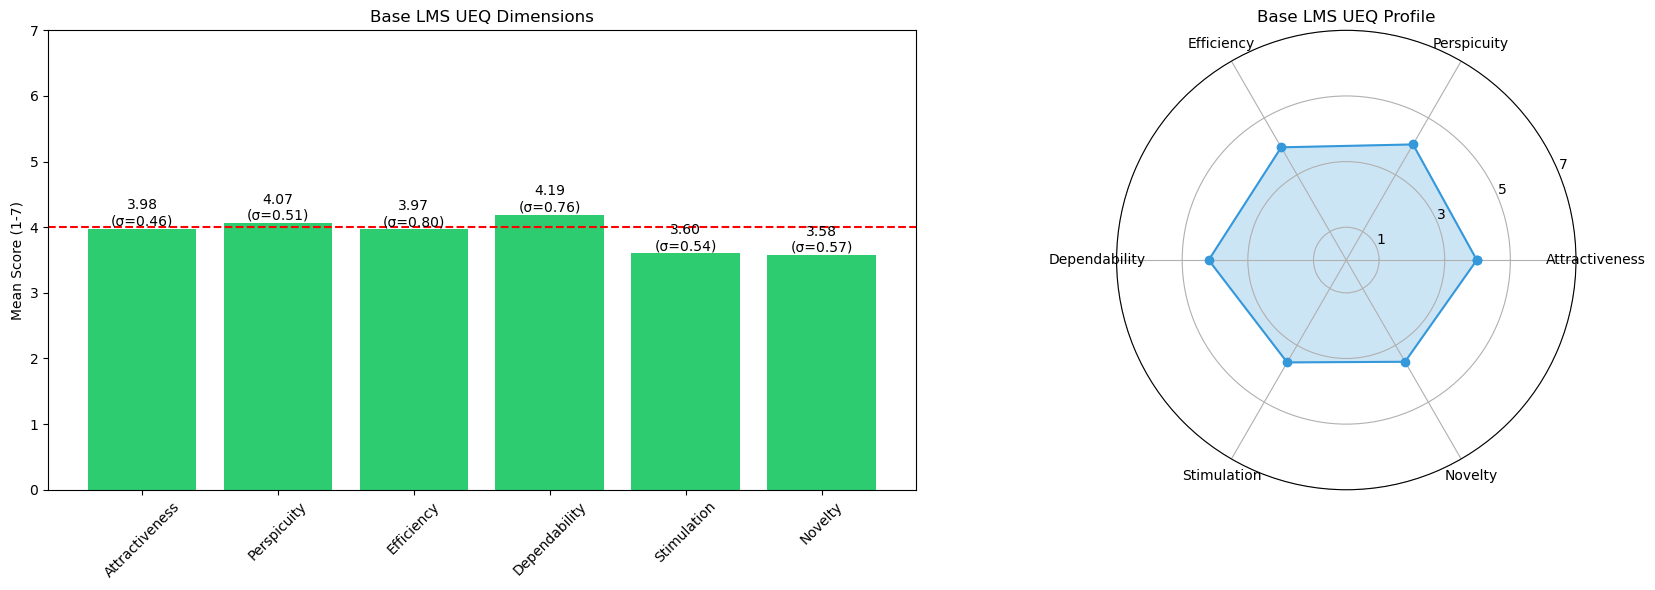

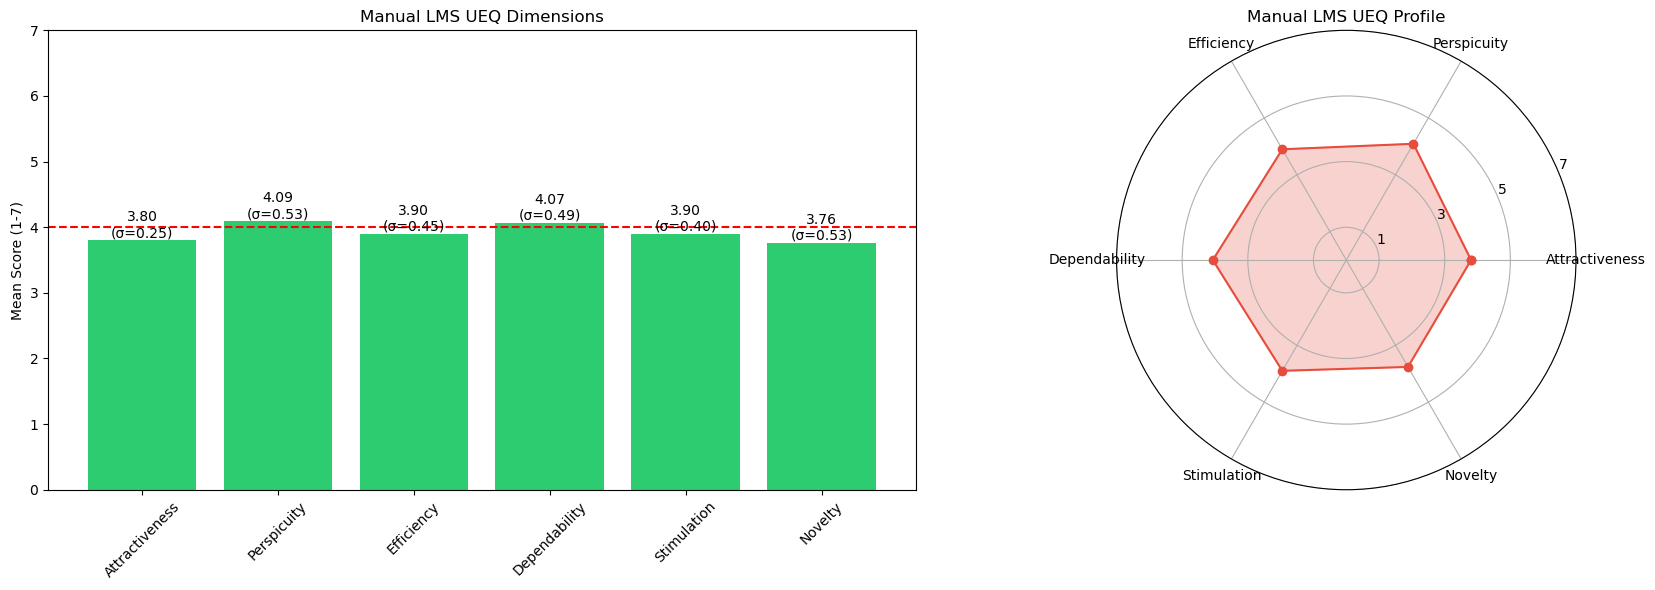

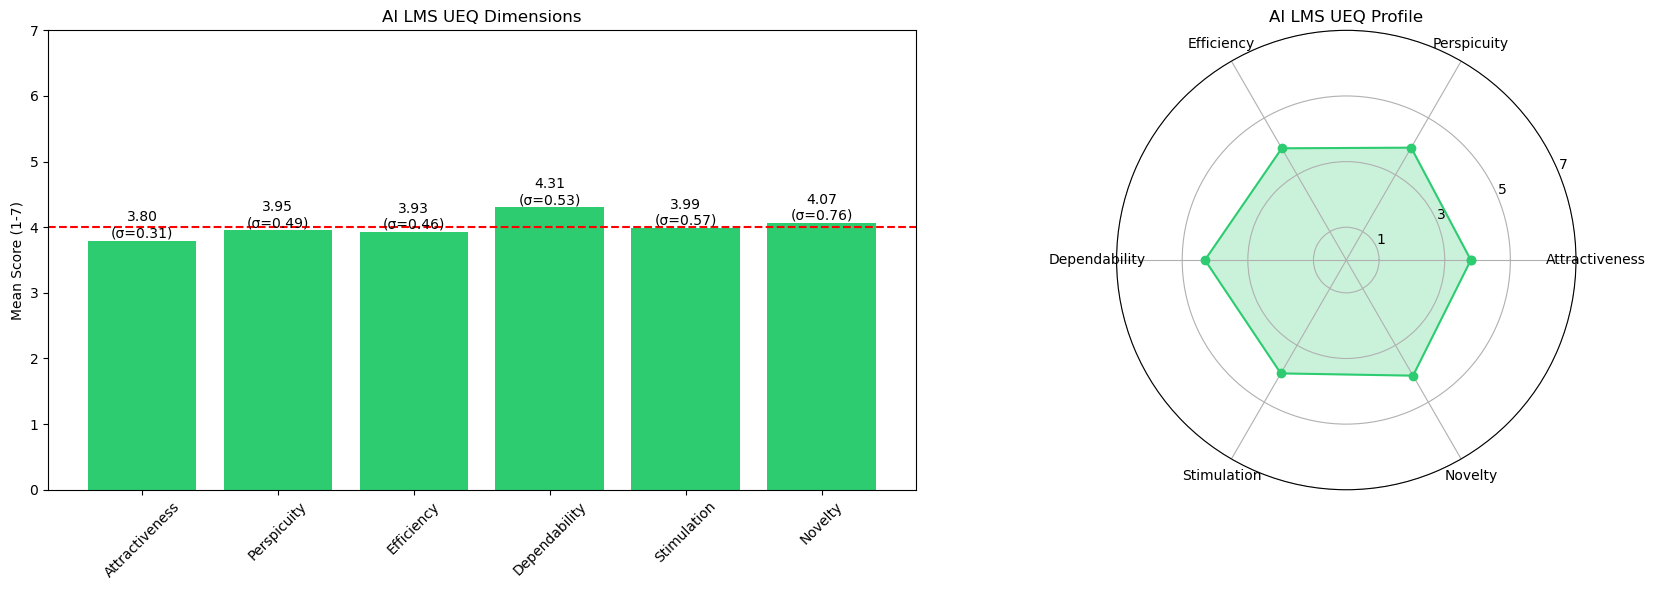

In [17]:
#UEQ dimensions analysis for each LMS

def plot_ueq_analysis(lms, color):
    plt.figure(figsize=(18, 6))
    
    # Prepare UEQ data
    dims = ['Attractiveness', 'Perspicuity', 'Efficiency', 'Dependability', 'Stimulation', 'Novelty']
    means = [df[f'{lms} LMS_UEQ_{dim}'].mean() for dim in dims]
    stds = [df[f'{lms} LMS_UEQ_{dim}'].std() for dim in dims]
    
    # 1. UEQ Dimension Means with Agreement
    plt.subplot(1, 2, 1)
    colors = []
    for std in stds:
        if std < 0.83: colors.append('#2ecc71')  # Green
        elif std < 1.01: colors.append('#f39c12') # Orange
        else: colors.append('#e74c3c')            # Red
    
    bars = plt.bar(dims, means, color=colors)
    plt.axhline(4.0, color='red', linestyle='--', label='Positive Threshold')
    plt.title(f'{lms} LMS UEQ Dimensions')
    plt.ylabel('Mean Score (1-7)')
    plt.ylim(0, 7)
    plt.xticks(rotation=45)
    
    # Add value labels
    for bar, mean, std in zip(bars, means, stds):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{mean:.2f}\n(σ={std:.2f})',
                ha='center', va='bottom')
    
    # 2. Radar Chart
    plt.subplot(1, 2, 2, polar=True)
    angles = np.linspace(0, 2*np.pi, len(dims), endpoint=False).tolist()
    angles += angles[:1]
    means += means[:1]
    
    plt.plot(angles, means, 'o-', color=color)
    plt.fill(angles, means, alpha=0.25, color=color)
    plt.xticks(angles[:-1], dims)
    plt.yticks([1, 3, 5, 7], ['1', '3', '5', '7'])
    plt.title(f'{lms} LMS UEQ Profile')
    
    plt.tight_layout()
    plt.show()

# Generate reports for each LMS
plot_ueq_analysis('Base', '#3498db')
plot_ueq_analysis('Manual', '#e74c3c')
plot_ueq_analysis('AI', '#2ecc71')

In [18]:
#UEQ Interpretation for each LMS

def interpret_ueq(lms):
    print(f"\nUEQ Interpretation for {lms} LMS:")
    dims = ['Attractiveness', 'Perspicuity', 'Efficiency', 'Dependability', 'Stimulation', 'Novelty']
    
    for dim in dims:
        col = f'{lms} LMS_UEQ_{dim}'
        mean = df[col].mean()
        std = df[col].std()
        
        print(f"\n{dim}:")
        print(f"  Mean: {mean:.2f} ({'Positive' if mean >=4 else 'Needs improvement'})")
        print(f"  Agreement: {'High' if std<0.83 else 'Medium' if std<1.01 else 'Low'}")
        
        if mean < 4:
            print("  * Action: This dimension requires improvement")
        if std > 1.01:
            print("  * Warning: Low agreement among participants")

# Generate interpretations
interpret_ueq('Base')
interpret_ueq('Manual')
interpret_ueq('AI')


UEQ Interpretation for Base LMS:

Attractiveness:
  Mean: 3.98 (Needs improvement)
  Agreement: High
  * Action: This dimension requires improvement

Perspicuity:
  Mean: 4.07 (Positive)
  Agreement: High

Efficiency:
  Mean: 3.97 (Needs improvement)
  Agreement: High
  * Action: This dimension requires improvement

Dependability:
  Mean: 4.19 (Positive)
  Agreement: High

Stimulation:
  Mean: 3.60 (Needs improvement)
  Agreement: High
  * Action: This dimension requires improvement

Novelty:
  Mean: 3.58 (Needs improvement)
  Agreement: High
  * Action: This dimension requires improvement

UEQ Interpretation for Manual LMS:

Attractiveness:
  Mean: 3.80 (Needs improvement)
  Agreement: High
  * Action: This dimension requires improvement

Perspicuity:
  Mean: 4.09 (Positive)
  Agreement: High

Efficiency:
  Mean: 3.90 (Needs improvement)
  Agreement: High
  * Action: This dimension requires improvement

Dependability:
  Mean: 4.07 (Positive)
  Agreement: High

Stimulation:
  Mean: 3.

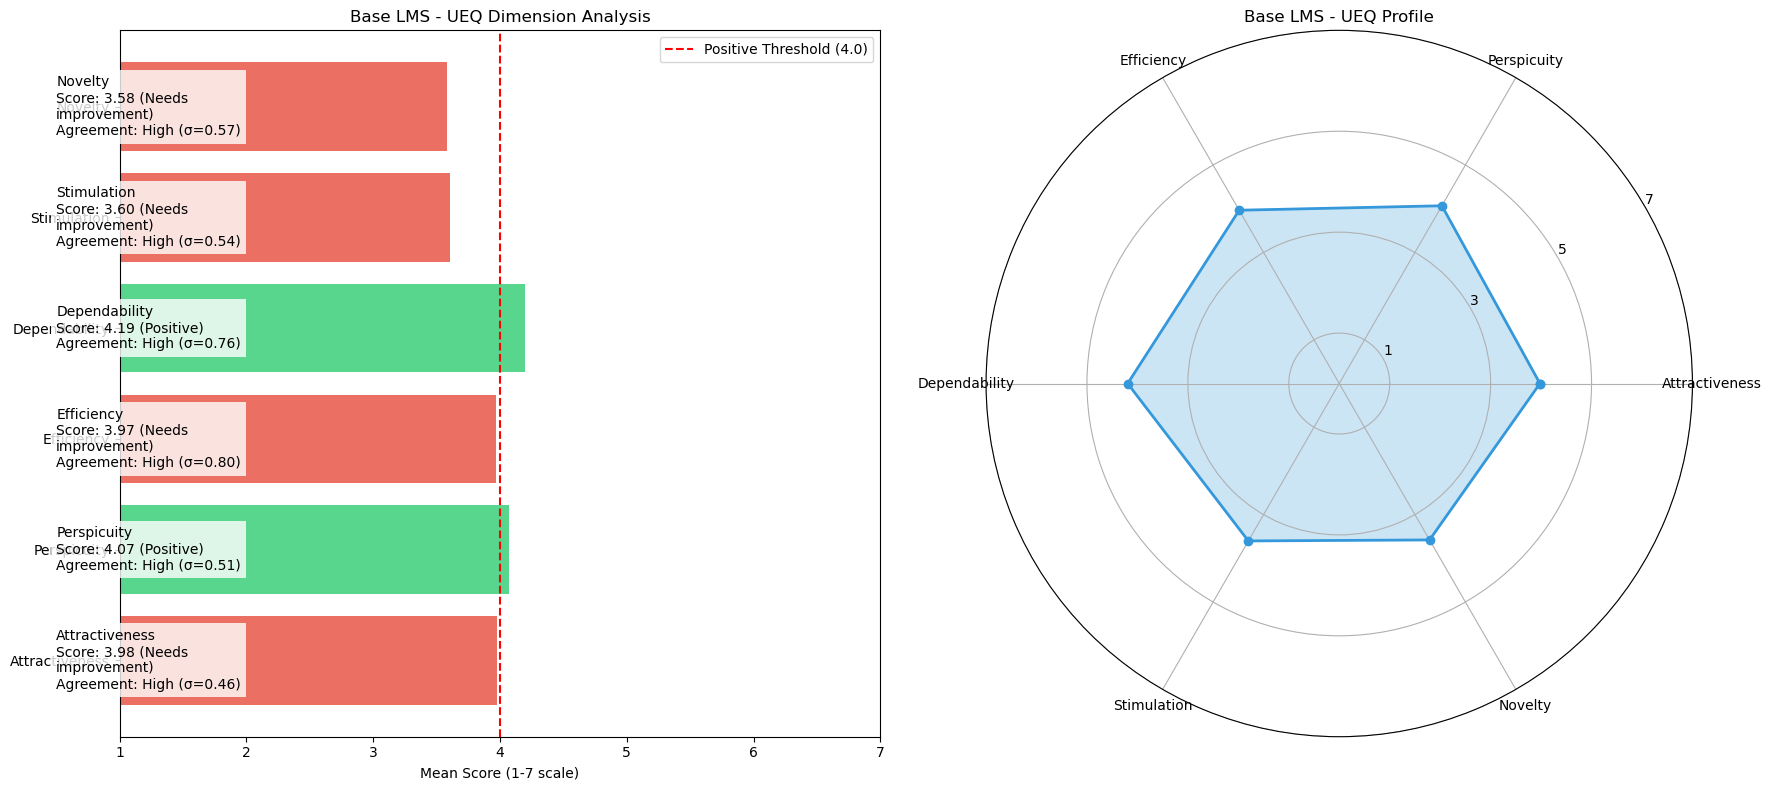

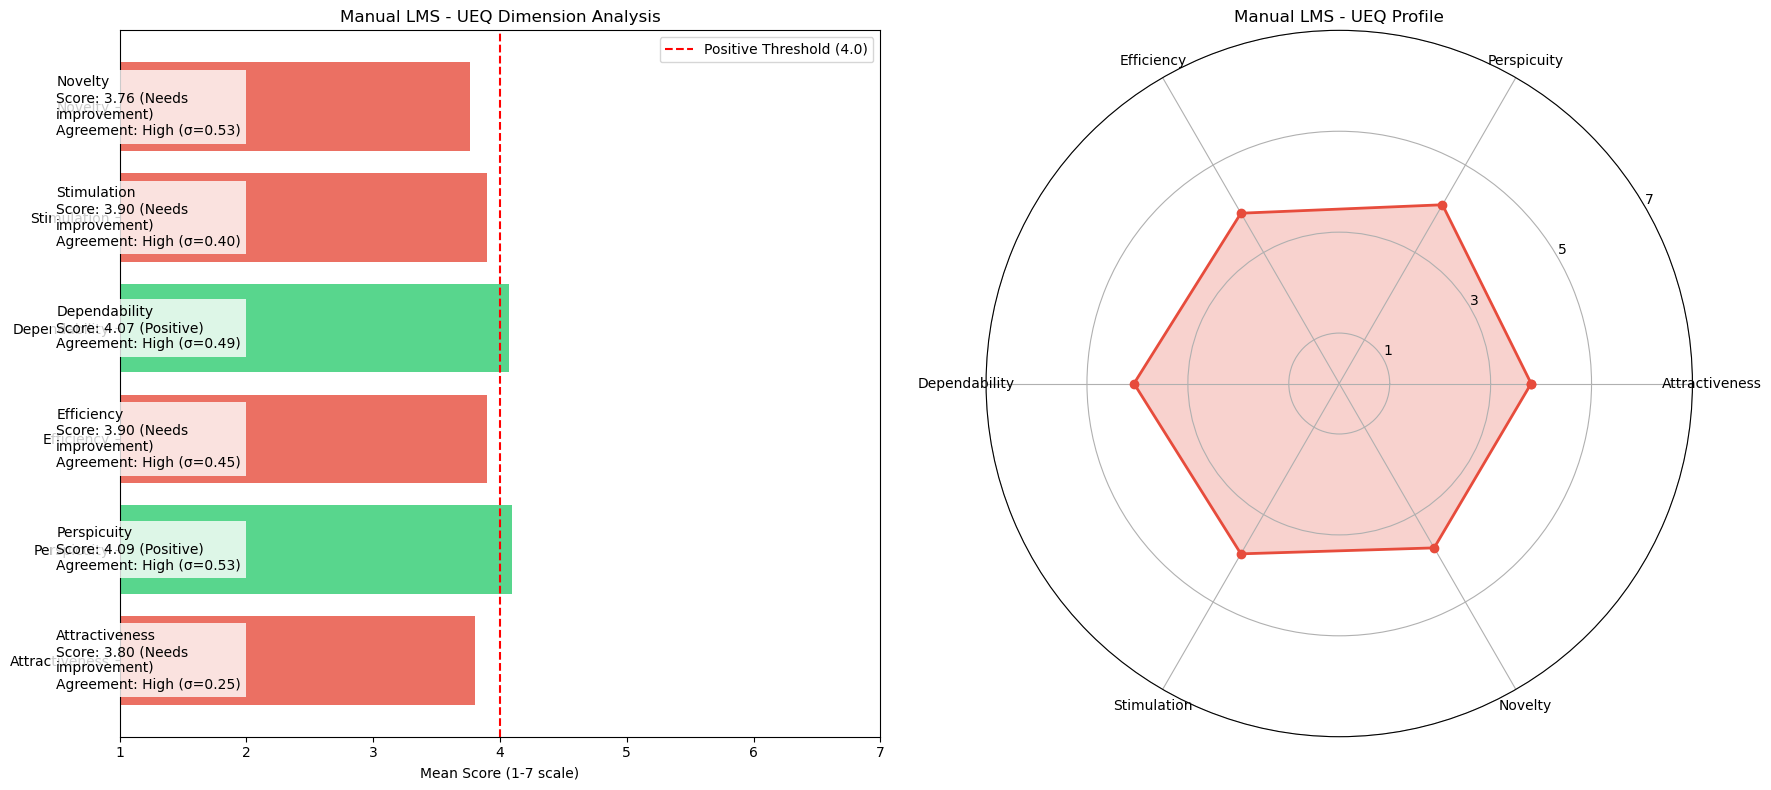

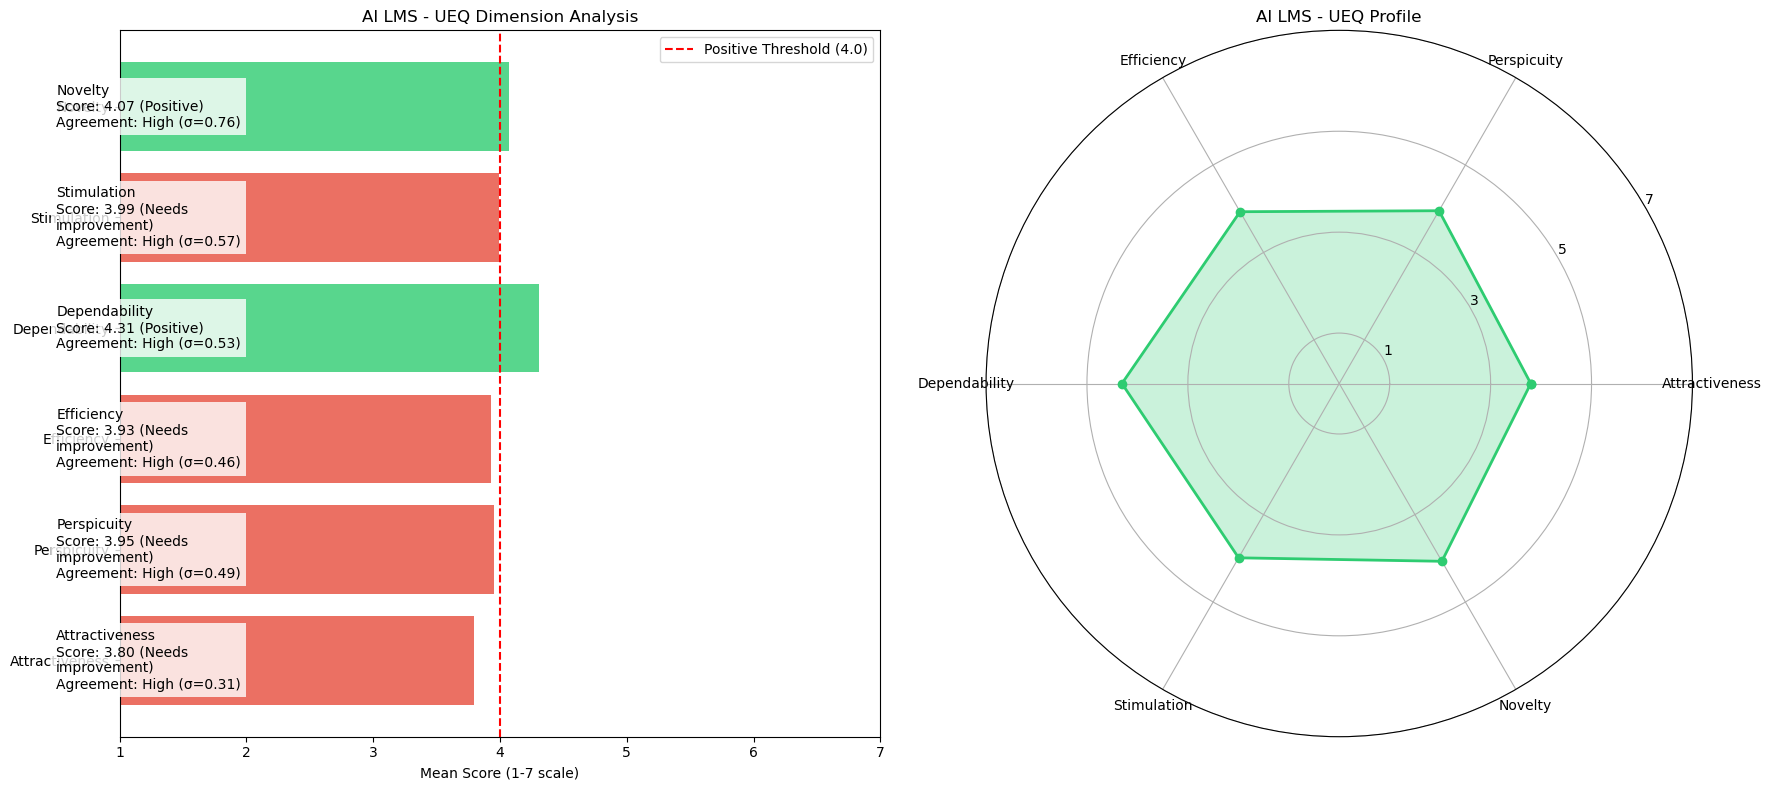

In [19]:
#UEQ dimension analysis for each LMS

def visualize_ueq_interpretation(lms, color):
    dims = ['Attractiveness', 'Perspicuity', 'Efficiency', 'Dependability', 'Stimulation', 'Novelty']
    means = [df[f'{lms} LMS_UEQ_{dim}'].mean() for dim in dims]
    stds = [df[f'{lms} LMS_UEQ_{dim}'].std() for dim in dims]
    
    # Create figure with 2 subplots
    plt.figure(figsize=(18, 8))
    
    # 1. Main Interpretation Chart
    plt.subplot(1, 2, 1)
    
    # Create color coding and annotations
    annotations = []
    colors = []
    for mean, std, dim in zip(means, stds, dims):
        # Score interpretation
        if mean >= 4:
            score_status = 'Positive'
            score_color = '#2ecc71'  # Green
        else:
            score_status = 'Needs\nimprovement'
            score_color = '#e74c3c'  # Red
        
        # Agreement interpretation
        if std < 0.83:
            agreement_status = 'High'
            agreement_color = '#2ecc71'  # Green
        elif std < 1.01:
            agreement_status = 'Medium'
            agreement_color = '#f39c12'  # Orange
        else:
            agreement_status = 'Low'
            agreement_color = '#e74c3c'  # Red
        
        annotations.append(
            f"{dim}\n"
            f"Score: {mean:.2f} ({score_status})\n"
            f"Agreement: {agreement_status} (σ={std:.2f})"
        )
        colors.append(score_color)  # Using score color for bars
    
    # Create bar plot
    bars = plt.barh(dims, means, color=colors, alpha=0.8)
    plt.axvline(4.0, color='red', linestyle='--', label='Positive Threshold (4.0)')
    
    # Add annotations
    for bar, annotation in zip(bars, annotations):
        plt.text(0.5, bar.get_y() + bar.get_height()/2, annotation,
                va='center', ha='left', color='black',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    plt.title(f'{lms} LMS - UEQ Dimension Analysis')
    plt.xlabel('Mean Score (1-7 scale)')
    plt.xlim(1, 7)
    plt.legend()
    
    # 2. Radar Chart for Visual Profile
    plt.subplot(1, 2, 2, polar=True)
    
    angles = np.linspace(0, 2*np.pi, len(dims), endpoint=False).tolist()
    angles += angles[:1]
    radar_means = means.copy()
    radar_means += radar_means[:1]
    
    plt.plot(angles, radar_means, 'o-', color=color, linewidth=2)
    plt.fill(angles, radar_means, color=color, alpha=0.25)
    plt.xticks(angles[:-1], dims)
    plt.yticks([1, 3, 5, 7], ['1', '3', '5', '7'])
    plt.title(f'{lms} LMS - UEQ Profile')
    plt.gca().set_rlabel_position(30)
    
    plt.tight_layout()
    plt.show()

# Generate visual interpretations
visualize_ueq_interpretation('Base', '#3498db')
visualize_ueq_interpretation('Manual', '#e74c3c')
visualize_ueq_interpretation('AI', '#2ecc71')

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


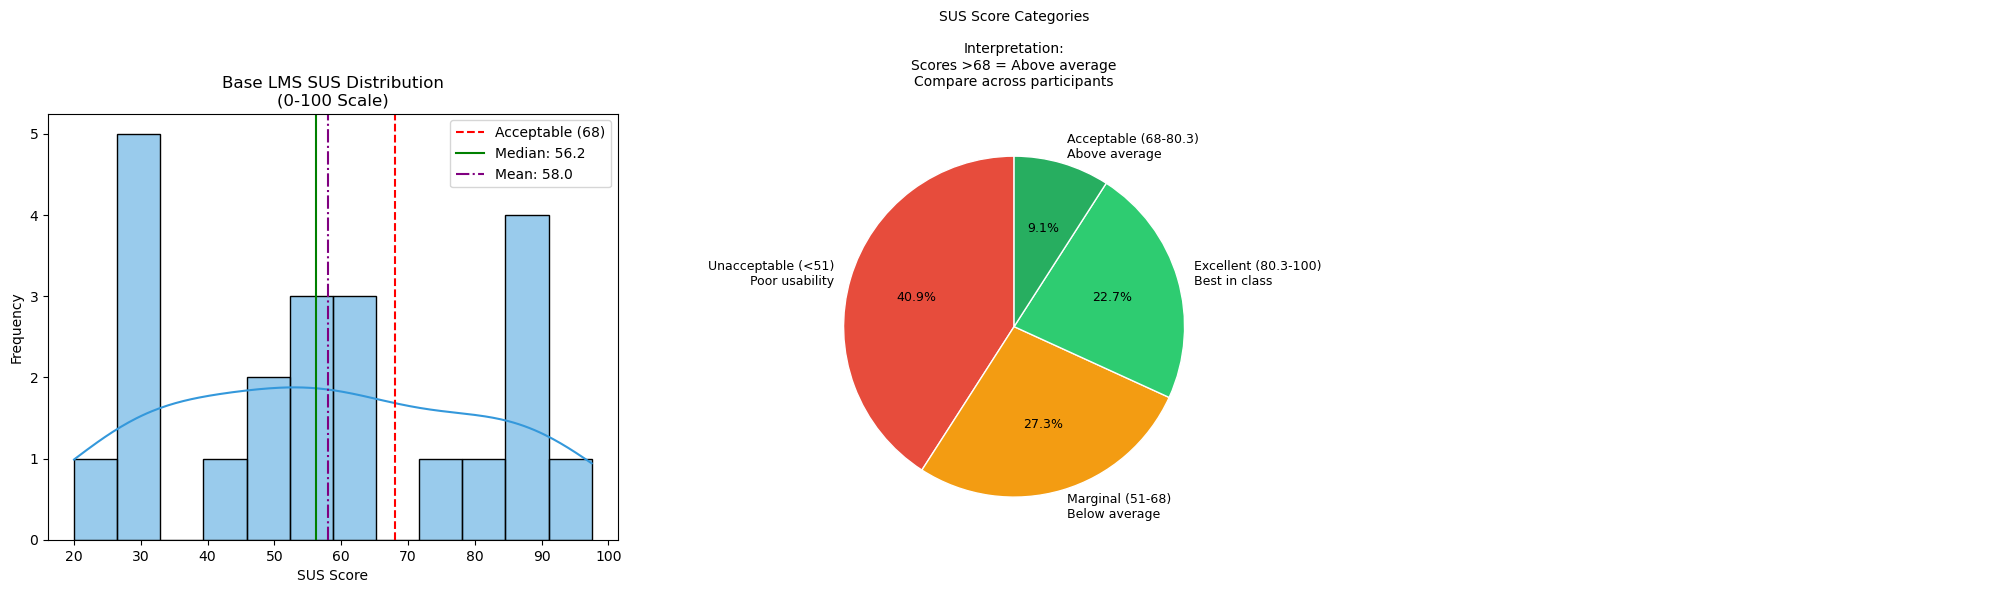

In [20]:
# Base LMS - SUS Score Analysis with Enhanced Interpretation
plt.figure(figsize=(20, 6))

# 1.1 SUS Distribution with Percentile Lines
plt.subplot(1, 3, 1)
ax = sns.histplot(df['Base LMS_SUS score'], bins=12, kde=True, color='#3498db')
plt.axvline(68, color='red', linestyle='--', label='Acceptable (68)')
plt.axvline(df['Base LMS_SUS score'].median(), color='green', linestyle='-', 
            label=f'Median: {df["Base LMS_SUS score"].median():.1f}')
plt.axvline(df['Base LMS_SUS score'].mean(), color='purple', linestyle='-.', 
            label=f'Mean: {df["Base LMS_SUS score"].mean():.1f}')
plt.title('Base LMS SUS Distribution\n(0-100 Scale)')
plt.xlabel('SUS Score')
plt.ylabel('Frequency')
plt.legend()

# 1.2 Enhanced SUS Categories Pie Chart with Interpretation
plt.subplot(1, 3, 2)
sus_bins = [0, 51, 68, 80.3, 100]
labels = [
    'Unacceptable (<51)\nPoor usability',
    'Marginal (51-68)\nBelow average', 
    'Acceptable (68-80.3)\nAbove average',
    'Excellent (80.3-100)\nBest in class'
]

df['SUS_Category'] = pd.cut(df['Base LMS_SUS score'], bins=sus_bins, labels=labels)
sus_counts = df['SUS_Category'].value_counts()

wedges, texts, autotexts = plt.pie(
    sus_counts, 
    labels=sus_counts.index, 
    autopct='%1.1f%%', 
    colors=['#e74c3c', '#f39c12', '#2ecc71', '#27ae60'], 
    startangle=90,
    textprops={'fontsize': 9},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title('SUS Score Categories\n\nInterpretation:\nScores >68 = Above average\nCompare across participants', 
          fontsize=10, pad=20)

# 1.3 SUS Performance Dashboard
plt.subplot(1, 3, 3)
plt.axis('off')

# Calculate metrics
above_avg = df[df['Base LMS_SUS score'] > 68]['Base LMS_SUS score'].count()
percent_above = above_avg/len(df)*100
mean_score = df['Base LMS_SUS score'].mean()
median_score = df['Base LMS_SUS score'].median()

plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


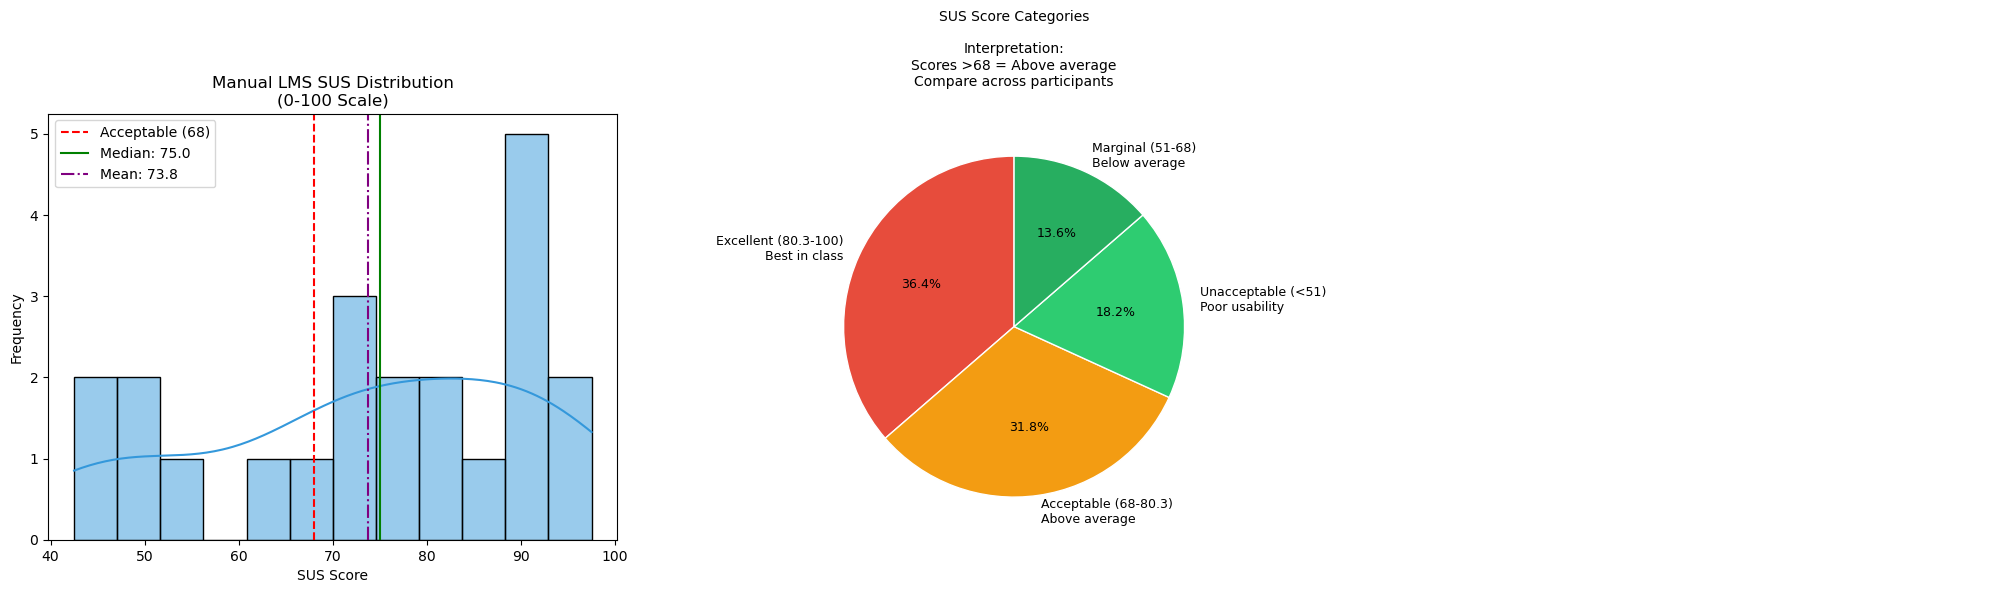

In [21]:
# Manual LMS - SUS Score Analysis with Enhanced Interpretation
plt.figure(figsize=(20, 6))

# 1.1 SUS Distribution with Percentile Lines
plt.subplot(1, 3, 1)
ax = sns.histplot(df['Manual LMS_SUS score'], bins=12, kde=True, color='#3498db')
plt.axvline(68, color='red', linestyle='--', label='Acceptable (68)')
plt.axvline(df['Manual LMS_SUS score'].median(), color='green', linestyle='-', 
            label=f'Median: {df["Manual LMS_SUS score"].median():.1f}')
plt.axvline(df['Manual LMS_SUS score'].mean(), color='purple', linestyle='-.', 
            label=f'Mean: {df["Manual LMS_SUS score"].mean():.1f}')
plt.title('Manual LMS SUS Distribution\n(0-100 Scale)')
plt.xlabel('SUS Score')
plt.ylabel('Frequency')
plt.legend()

# 1.2 Enhanced SUS Categories Pie Chart with Interpretation
plt.subplot(1, 3, 2)
sus_bins = [0, 51, 68, 80.3, 100]
labels = [
    'Unacceptable (<51)\nPoor usability',
    'Marginal (51-68)\nBelow average', 
    'Acceptable (68-80.3)\nAbove average',
    'Excellent (80.3-100)\nBest in class'
]

df['SUS_Category'] = pd.cut(df['Manual LMS_SUS score'], bins=sus_bins, labels=labels)
sus_counts = df['SUS_Category'].value_counts()

wedges, texts, autotexts = plt.pie(
    sus_counts, 
    labels=sus_counts.index, 
    autopct='%1.1f%%', 
    colors=['#e74c3c', '#f39c12', '#2ecc71', '#27ae60'], 
    startangle=90,
    textprops={'fontsize': 9},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title('SUS Score Categories\n\nInterpretation:\nScores >68 = Above average\nCompare across participants', 
          fontsize=10, pad=20)

# 1.3 SUS Performance Dashboard
plt.subplot(1, 3, 3)
plt.axis('off')

# Calculate metrics
above_avg = df[df['Manual LMS_SUS score'] > 68]['Manual LMS_SUS score'].count()
percent_above = above_avg/len(df)*100
mean_score = df['Manual LMS_SUS score'].mean()
median_score = df['Manual LMS_SUS score'].median()

plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


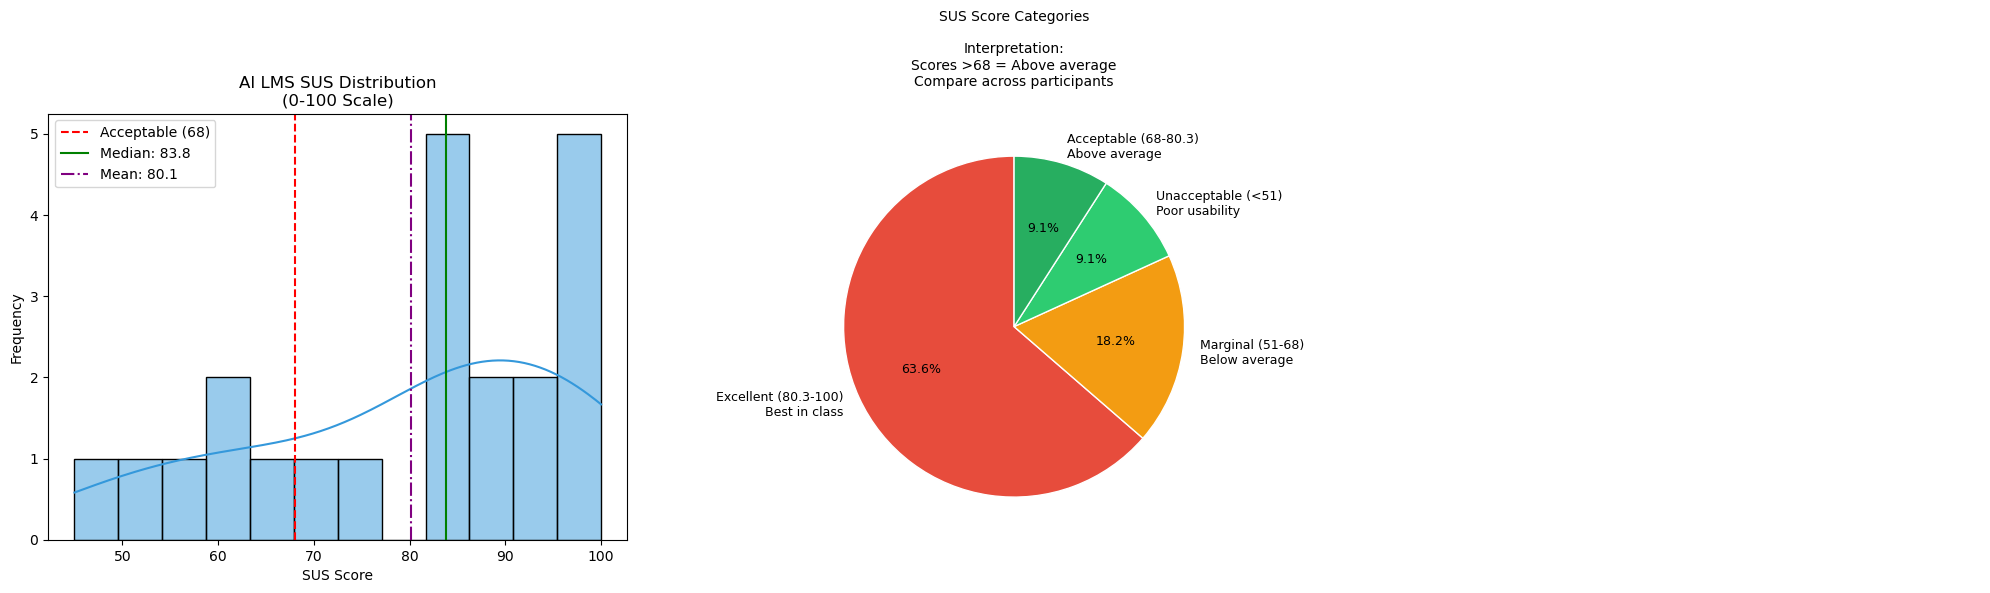

In [22]:
# AI LMS - SUS Score Analysis with Enhanced Interpretation
plt.figure(figsize=(20, 6))

# 1.1 SUS Distribution with Percentile Lines
plt.subplot(1, 3, 1)
ax = sns.histplot(df['AI LMS_SUS score'], bins=12, kde=True, color='#3498db')
plt.axvline(68, color='red', linestyle='--', label='Acceptable (68)')
plt.axvline(df['AI LMS_SUS score'].median(), color='green', linestyle='-', 
            label=f'Median: {df["AI LMS_SUS score"].median():.1f}')
plt.axvline(df['AI LMS_SUS score'].mean(), color='purple', linestyle='-.', 
            label=f'Mean: {df["AI LMS_SUS score"].mean():.1f}')
plt.title('AI LMS SUS Distribution\n(0-100 Scale)')
plt.xlabel('SUS Score')
plt.ylabel('Frequency')
plt.legend()

# 1.2 Enhanced SUS Categories Pie Chart with Interpretation
plt.subplot(1, 3, 2)
sus_bins = [0, 51, 68, 80.3, 100]
labels = [
    'Unacceptable (<51)\nPoor usability',
    'Marginal (51-68)\nBelow average', 
    'Acceptable (68-80.3)\nAbove average',
    'Excellent (80.3-100)\nBest in class'
]

df['SUS_Category'] = pd.cut(df['AI LMS_SUS score'], bins=sus_bins, labels=labels)
sus_counts = df['SUS_Category'].value_counts()

wedges, texts, autotexts = plt.pie(
    sus_counts, 
    labels=sus_counts.index, 
    autopct='%1.1f%%', 
    colors=['#e74c3c', '#f39c12', '#2ecc71', '#27ae60'], 
    startangle=90,
    textprops={'fontsize': 9},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title('SUS Score Categories\n\nInterpretation:\nScores >68 = Above average\nCompare across participants', 
          fontsize=10, pad=20)

# 1.3 SUS Performance Dashboard
plt.subplot(1, 3, 3)
plt.axis('off')

# Calculate metrics
above_avg = df[df['AI LMS_SUS score'] > 68]['AI LMS_SUS score'].count()
percent_above = above_avg/len(df)*100
mean_score = df['AI LMS_SUS score'].mean()
median_score = df['AI LMS_SUS score'].median()

plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


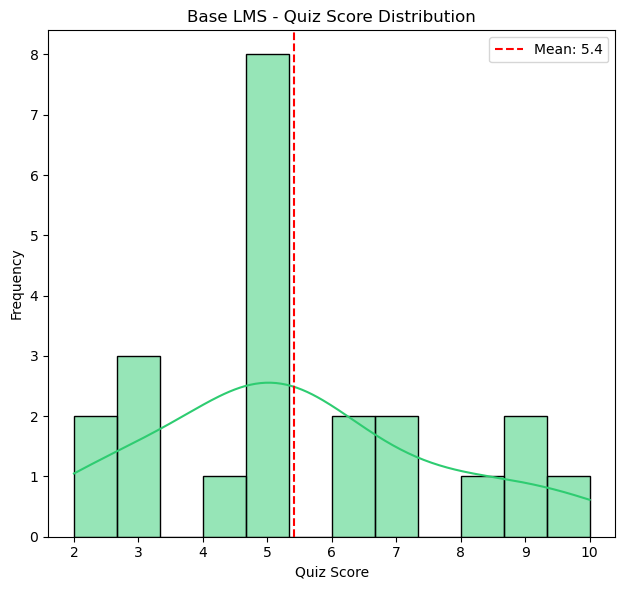

In [23]:
# Base LMS - Quiz Score Analysis
plt.figure(figsize=(18, 6))

# 2.1 Quiz Score Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Base LMS_Quiz score'], bins=12, kde=True, color='#2ecc71')
plt.axvline(df['Base LMS_Quiz score'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["Base LMS_Quiz score"].mean():.1f}')
plt.title('Base LMS - Quiz Score Distribution')
plt.xlabel('Quiz Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


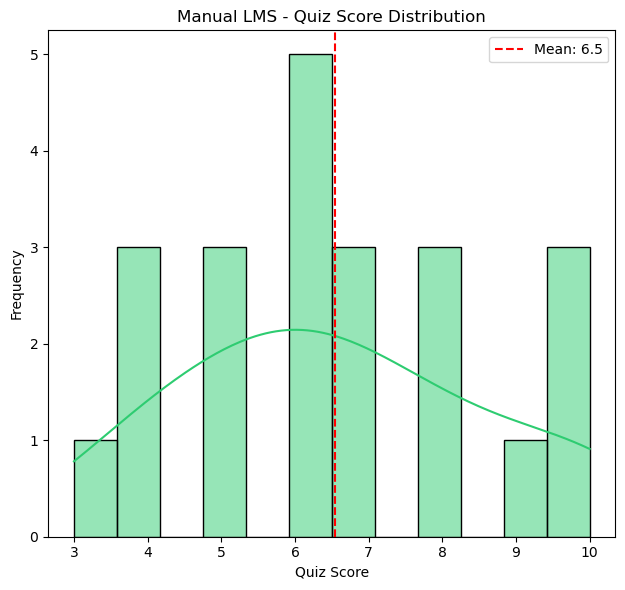

In [24]:
# Manual LMS - Quiz Score Analysis
plt.figure(figsize=(18, 6))

# 2.1 Quiz Score Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Manual LMS_Quiz score'], bins=12, kde=True, color='#2ecc71')
plt.axvline(df['Manual LMS_Quiz score'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["Manual LMS_Quiz score"].mean():.1f}')
plt.title('Manual LMS - Quiz Score Distribution')
plt.xlabel('Quiz Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


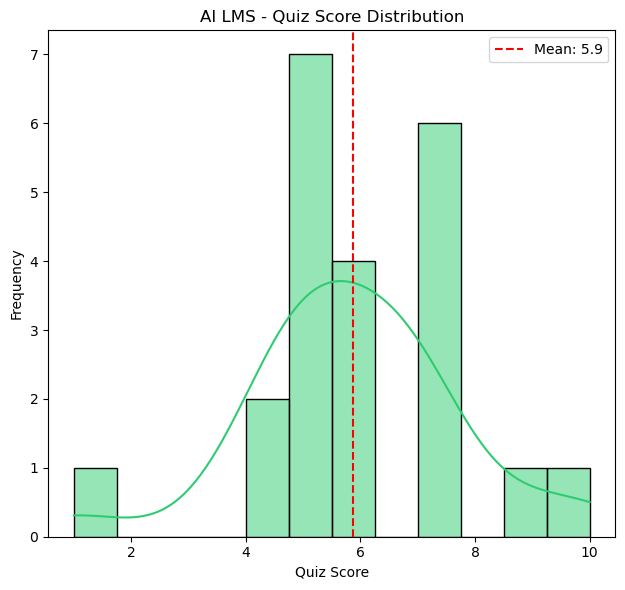

In [25]:
# AI LMS - Quiz Score Analysis
plt.figure(figsize=(18, 6))

# 2.1 Quiz Score Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['AI LMS_Quiz score'], bins=12, kde=True, color='#2ecc71')
plt.axvline(df['AI LMS_Quiz score'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["AI LMS_Quiz score"].mean():.1f}')
plt.title('AI LMS - Quiz Score Distribution')
plt.xlabel('Quiz Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()